In [0]:
from scipy.signal import TransferFunction
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [0]:
def esc_filtro(esc):
    if esc == "1":
        print("Butterworth P-B")
        return(1)
    else:
        print("Tai doido carai? Tem nem esse número aí")
        return(-1)

In [0]:
def btwrth(a_p, a_s, w_p, w_s):
    N = int(np.ceil(np.log10((np.power(((np.power(10.0, (-a_s/10.0))-1.0)/(np.power(10.0, (-a_p/10.0))-1.0)), 0.5)))/np.log10((w_s/w_p)))) #Ordem do filtro
    S_k = np.zeros(N, dtype = complex) #incialização do vetor das raízes
    denm = np.zeros(N+1, dtype=float) #inicialização do vetor do denominador após transformação de frequência
    for i in range(1,N+1):
        S_k[i-1] = -np.sin(np.pi*(2*i - 1)/(2*N)) + (1j*np.cos(np.pi*(2*i - 1)/(2*N))) #cálculo das raízes
    wc = w_p/(np.power((np.power(10.0,((-1)*a_p/10.0)) - 1.0), (1.0/(2*2)))) #cálculo da frequência de corte
    den = np.real(np.poly(S_k)) #denominador a partir das raízes
    for i in range(0, N+1): #transformação de frequência
      if(i == 0): 
        denm[i] = den[i] #para o termo de maior ordem
      else: 
        denm[i] = (den[i]/den[-1])*(np.power(wc, i)) #para os termos de ordem N-1 até o termo independente
    num = denm[-1] #numerador = último elemento do denominador
    tf = TransferFunction(num,denm) #criação da função de transferência com transformação de frequência
    #print(tf) #mostra a TF

    w, amp, fase = tf.bode() #cria um elemento do gráfico de bode, retorna frequência; amplitude e fase
    #plotagem
    fig, ax = plt.subplots()
    ax.semilogx(w, amp)
    ax.set(xlabel = "Frequência (rad/s)", ylabel = "Amplitude em dB", title = "Resposta em amplitude")
    ax.set_yticks(range(0,-40,-3))
    ax.margins(x=0)
    ax.margins(y=0.08)
    ax.grid()
    return [N, wc, tf, fig]
    #fig.savefig("amplitude.png", bbox_inches='tight')
    #plt.show()

In [0]:
def filtros():
    print("Escolhe o filtro maxo:\n")
    print("1. Butterworth")
    resp = input("Digita o número do lado, abestaiado: ")
    tipo = esc_filtro(resp)
    if tipo == 1: #butterworth PB
        print("Parâmetros de entrada do BUTTERWORTH - PB: Ap As Wp Ws")
        a_p, a_s, w_p, w_s = input("Digite os parâmetros separados por espaço simples, na ordem vista na linha anterior: ").split()
        [N, wc, tf, ax] = btwrth(float(a_p), float(a_s), float(w_p), float(w_s))
    return [N, wc, tf, ax]

Escolhe o filtro maxo:

1. Butterworth
Digita o número do lado, abestaiado: 1
Butterworth P-B
Parâmetros de entrada do BUTTERWORTH - PB: Ap As Wp Ws
Digite os parâmetros separados por espaço simples, na ordem vista na linha anterior: -2 -20 1000 10000


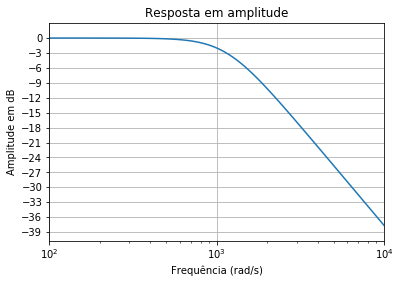

In [0]:
ordem, wc, func, grafico = filtros()